In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()

# Wykres degradacji epsilona

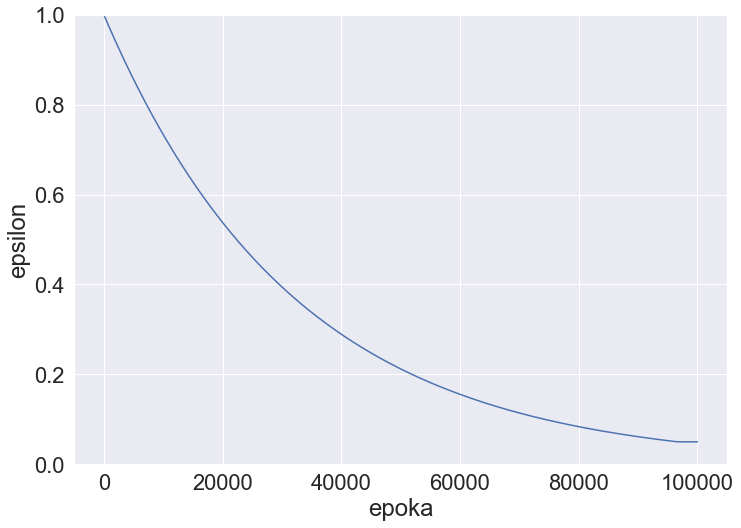

In [144]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
epsilon = 0.9999
epsilon_degrad = 0.999969
min_epsilon = 0.05
episodes = 100_000
eps_list = np.zeros(episodes)
for i in range(episodes):
    eps_list[i] = epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_degrad)
df = pd.DataFrame({"epoka" : np.arange(0, episodes)})
df["epsilon"] = eps_list
sns.lineplot(data=df, x="epoka", y="epsilon")
ax.set(ylim=(0, 1))
f.savefig("epsilon_100k.png", bbox_inches='tight', pad_inches=0.1, dpi=500) 

# Badanie rozmiarów warstw

In [4]:
achitecture_test_numpy = ["architecture_test/arrays_random_64_64_64_32.npy", "architecture_test/arrays_random_128_128_128_64.npy", "architecture_test/arrays_random_256_256_256_128.npy"]
achitecture_test_model = ["architecture_test/random_model_64_64_64_32.h5", "architecture_test/random_model_128_128_128_64.h5", "architecture_test/random_model_256_256_256_128.h5"]
architecture_names = ["64-64-64-32", "128-128-128-64", "256-256-256-128"]

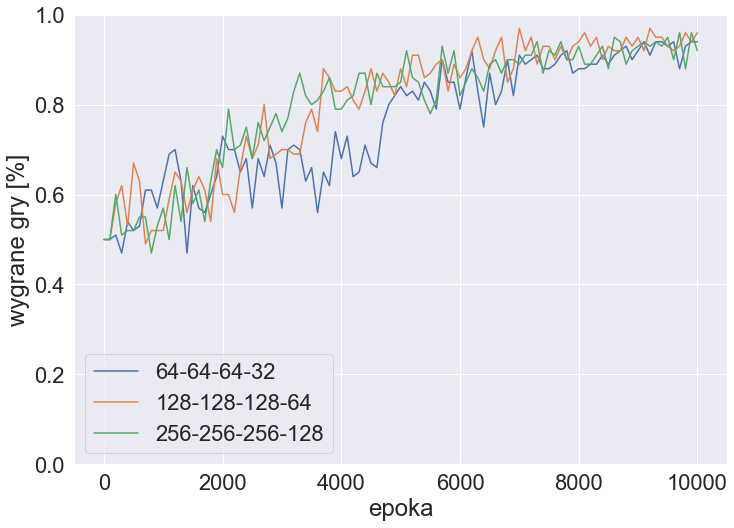

In [5]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, model_name, name in zip(achitecture_test_numpy, achitecture_test_model, architecture_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_0"])
    arr[:2] = 0.5
    df = pd.DataFrame({"epoka" : np.arange(0, 101*100, 100)})
    df["wygrane gry [%]"] = arr
    sns.lineplot(data=df, x="epoka", y="wygrane gry [%]")
# plt.plot(np.arange(0, 101*100, 100), np.ones(101))
ax.set(ylim=(0, 1))
ax.legend(architecture_names, loc=3)
f.savefig("architecture_test/compare_winrate_size.png", bbox_inches='tight', pad_inches=0.1, dpi=500) 

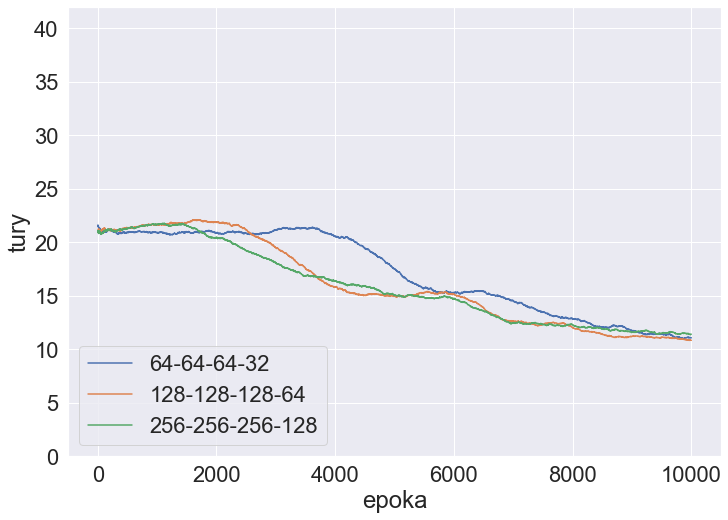

In [6]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, model_name, name in zip(achitecture_test_numpy, achitecture_test_model, architecture_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_3"])
    total_turns = np.zeros(len(arr))
    for i in range(len(total_turns)):
        total_turns[i] = np.mean(arr[max(0, i-1000):(i+1)])
    df = pd.DataFrame({"epoka" : np.linspace(0, 10000, num=9800)})
    df["tury"] = total_turns[200:]
    sns.lineplot(data=df, x="epoka", y="tury")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.set(ylim=(0, 42))
ax.legend(architecture_names, loc=3)
f.savefig("architecture_test/compare_turn_size.png", bbox_inches='tight', pad_inches=0, dpi=500)

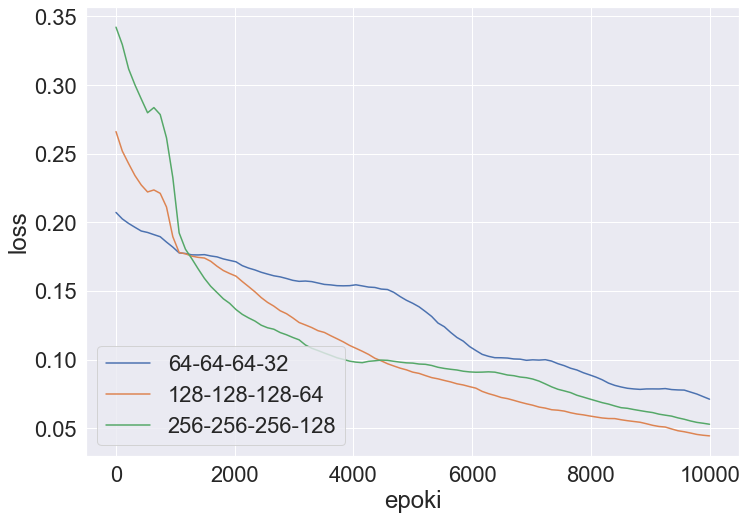

In [7]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, model_name, name in zip(achitecture_test_numpy, achitecture_test_model, architecture_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_4"])
    mean_loss = np.zeros(len(arr))
    for i in range(0, len(arr), 100):
        mean_loss[i] = np.mean(arr[max(0, i-1000):(i+1)])
    mean_loss = mean_loss[mean_loss != 0][5:]
    df = pd.DataFrame({"epoki" : np.linspace(0, 10000, num=len(mean_loss))})
    df["loss"] = mean_loss
    sns.lineplot(data=df, x="epoki", y="loss")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.legend(architecture_names, loc=3)
f.savefig("architecture_test/compare_loss_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

# Współczynnik uczenia

In [8]:
lr_test_numpy = ["learning_rate/arrays_random_lr-0-1.npy", "learning_rate/arrays_random_lr-0-01.npy", "learning_rate/arrays_random_lr-0-0001.npy", "learning_rate/arrays_random_lr-0-00001.npy"]
lr_test_model = ["architecture_test/random_model_64_64_64_32.h5", "architecture_test/random_model_128_128_128_64.h5", "architecture_test/random_model_256_256_256_128.h5"]
lr_names = ["0.1", "0.01", "0.0001", "0.00001"]

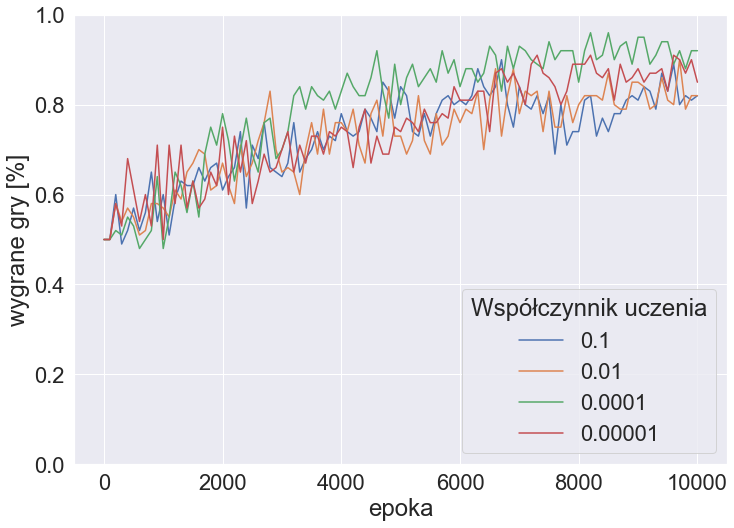

In [9]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(lr_test_numpy, lr_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_0"])
    arr[:2] = 0.5
    df = pd.DataFrame({"epoka" : np.arange(0, 101*100, 100)})
    df["wygrane gry [%]"] = arr
    sns.lineplot(data=df, x="epoka", y="wygrane gry [%]")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.set(ylim=(0, 1))
ax.legend(lr_names, loc=4, title="Współczynnik uczenia")
f.savefig("learning_rate/compare_winrate_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

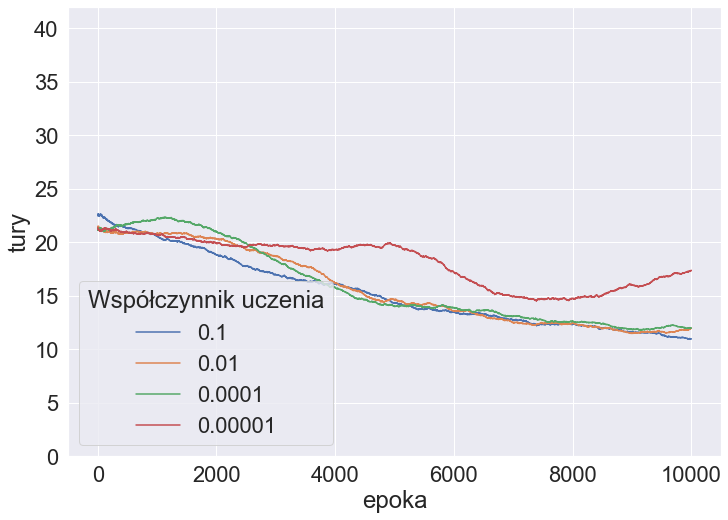

In [10]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(lr_test_numpy, lr_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_3"])
    total_turns = np.zeros(len(arr))
    for i in range(len(total_turns)):
        total_turns[i] = np.mean(arr[max(0, i-1000):(i+1)])
    df = pd.DataFrame({"epoka" : np.linspace(0, 10000, num=9800)})
    df["tury"] = total_turns[200:]
    sns.lineplot(data=df, x="epoka", y="tury")
ax.set(ylim=(0, 42))
ax.legend(lr_names, loc=3, title="Współczynnik uczenia")
f.savefig("learning_rate/compare_turn_size.png", bbox_inches='tight', pad_inches=0, dpi=500)

In [12]:
# sns.set(font_scale=2)
# rcParams['figure.figsize'] = 11.7,8.27
# f, ax = plt.subplots(2, 1)
# for arr_name, name in zip(lr_test_numpy, lr_names):
#     test = np.load(arr_name)
#     arr = np.array(test["arr_4"])
#     mean_loss = np.zeros(len(arr))
#     for i in range(0, len(arr), 100):
#         mean_loss[i] = np.mean(arr[max(0, i-1000):(i+1)])
#     mean_loss = mean_loss[mean_loss != 0][5:]
#     df = pd.DataFrame({"epoki" : np.linspace(0, 10000, num=len(mean_loss))})
#     df["loss"] = mean_loss
#     sns.lineplot(data=df, x="epoki", y="loss")
# ax[0].legend(lr_names, loc=1, title="Współczynnik uczenia")
# f.savefig("learning_rate/compare_loss_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

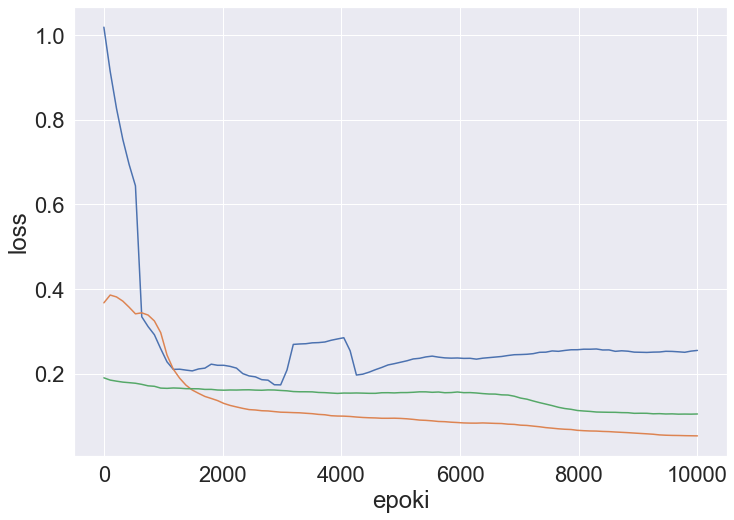

In [13]:
# sns.set(font_scale=2)
# rcParams['figure.figsize'] = 11.7,8.27
# f, ax = plt.subplots(1, 2)
for arr_name, name in zip(lr_test_numpy[1:], lr_names[1:]):
    test = np.load(arr_name)
    arr = np.array(test["arr_4"])
    mean_loss = np.zeros(len(arr))
    for i in range(0, len(arr), 100):
        mean_loss[i] = np.mean(arr[max(0, i-1000):(i+1)])
    mean_loss = mean_loss[mean_loss != 0][5:]
    df = pd.DataFrame({"epoki" : np.linspace(0, 10000, num=len(mean_loss))})
    df["loss"] = mean_loss
    sns.lineplot(data=df, x="epoki", y="loss")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax[1].legend(lr_names[1:], loc=1, title="Współczynnik uczenia")
f.savefig("learning_rate/compare_loss_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

# Ilość danych testowych batch size


In [14]:
bs_test_numpy = ["batch_size/arrays_random_bs32.npy", "batch_size/arrays_random_bs64.npy", "batch_size/arrays_random_bs128.npy"]
# lr_test_model = ["architecture_test/random_model_64_64_64_32.h5", "architecture_test/random_model_128_128_128_64.h5", "architecture_test/random_model_256_256_256_128.h5"]
bs_names = ["32", "64", "128"]

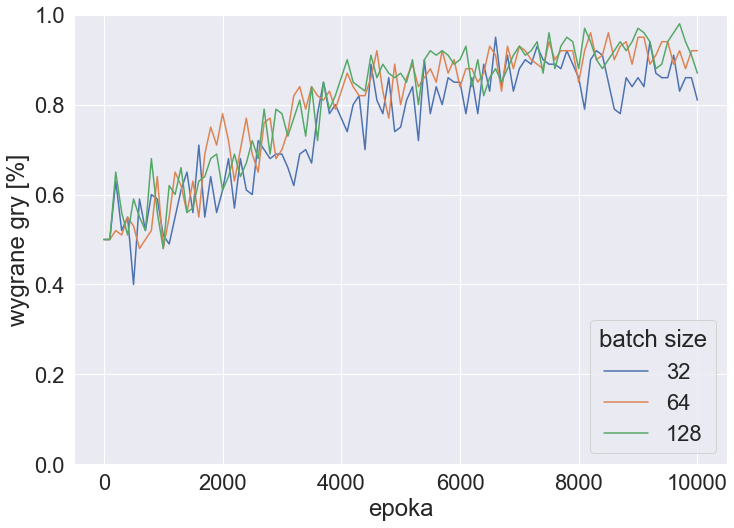

In [15]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(bs_test_numpy, bs_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_0"])
    arr[:2] = 0.5
    df = pd.DataFrame({"epoka" : np.arange(0, 101*100, 100)})
    df["wygrane gry [%]"] = arr
    sns.lineplot(data=df, x="epoka", y="wygrane gry [%]")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.set(ylim=(0, 1))
ax.legend(bs_names, loc=4, title="batch size")
f.savefig("batch_size/compare_winrate_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

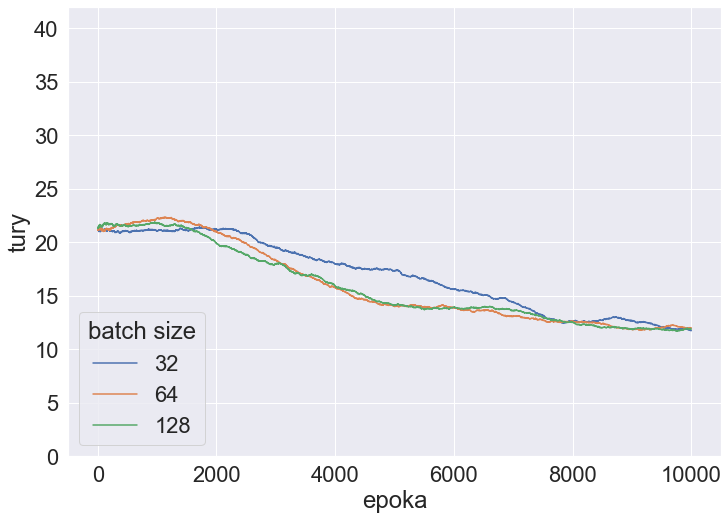

In [17]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(bs_test_numpy, bs_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_3"])
    total_turns = np.zeros(len(arr))
    for i in range(len(total_turns)):
        total_turns[i] = np.mean(arr[max(0, i-1000):(i+1)])
    df = pd.DataFrame({"epoka" : np.linspace(0, 10000, num=9800)})
    df["tury"] = total_turns[200:]
    sns.lineplot(data=df, x="epoka", y="tury")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.set(ylim=(0, 42))
ax.legend(bs_names, loc=3, title="batch size")
f.savefig("batch_size/compare_turn_size.png", bbox_inches='tight', pad_inches=0, dpi=500)

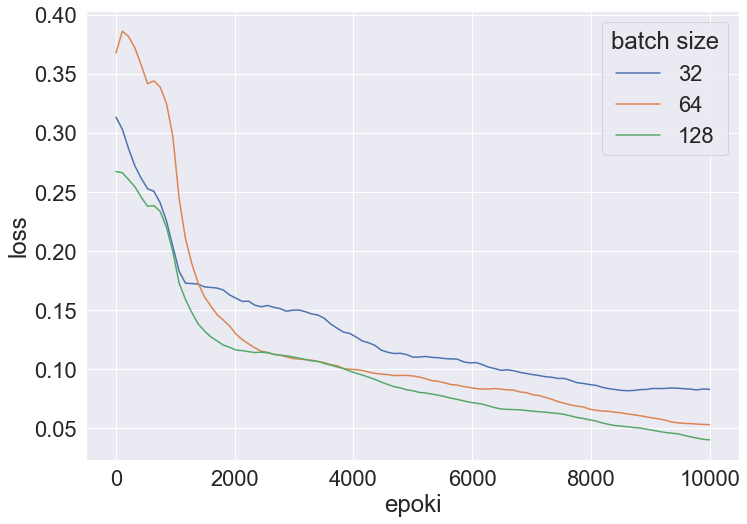

In [18]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(bs_test_numpy, bs_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_4"])
    mean_loss = np.zeros(len(arr))
    for i in range(0, len(arr), 100):
        mean_loss[i] = np.mean(arr[max(0, i-1000):(i+1)])
    mean_loss = mean_loss[mean_loss != 0][5:]
    df = pd.DataFrame({"epoki" : np.linspace(0, 10000, num=len(mean_loss))})
    df["loss"] = mean_loss
    sns.lineplot(data=df, x="epoki", y="loss")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.legend(bs_names, loc=1, title="batch size")
f.savefig("batch_size/compare_loss_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

# Copy step

In [19]:
cp_test_numpy = ["copy step/arrays_random_cp10.npy", "copy step/arrays_random_cp20.npy", "copy step/arrays_random_cp40.npy"]
# lr_test_model = ["architecture_test/random_model_64_64_64_32.h5", "architecture_test/random_model_128_128_128_64.h5", "architecture_test/random_model_256_256_256_128.h5"]
cp_names = ["10", "20", "40"]

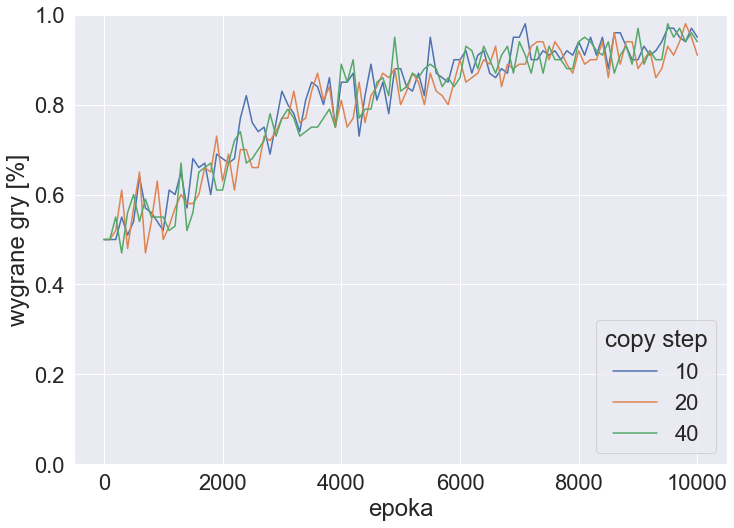

In [20]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(cp_test_numpy, cp_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_0"])
    arr[:2] = 0.5
    df = pd.DataFrame({"epoka" : np.arange(0, 101*100, 100)})
    df["wygrane gry [%]"] = arr
    sns.lineplot(data=df, x="epoka", y="wygrane gry [%]")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.set(ylim=(0, 1))
ax.legend(cp_names, loc=4, title="copy step")
f.savefig("copy step/compare_winrate_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

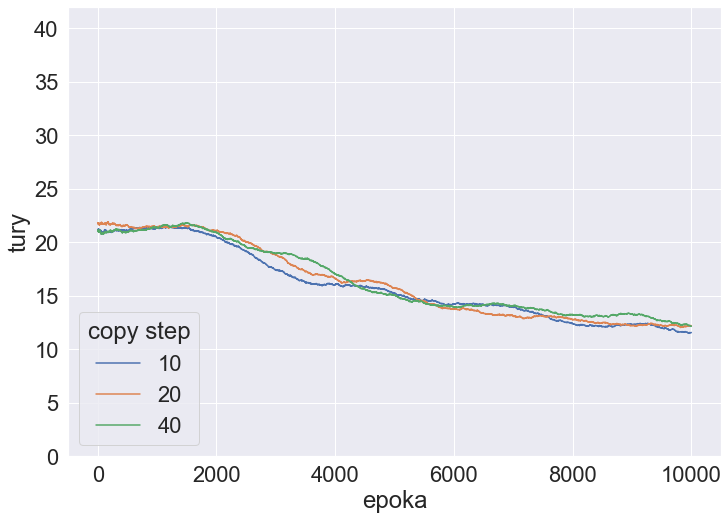

In [21]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(cp_test_numpy, cp_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_3"])
    total_turns = np.zeros(len(arr))
    for i in range(len(total_turns)):
        total_turns[i] = np.mean(arr[max(0, i-1000):(i+1)])
    df = pd.DataFrame({"epoka" : np.linspace(0, 10000, num=9800)})
    df["tury"] = total_turns[200:]
    sns.lineplot(data=df, x="epoka", y="tury")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.set(ylim=(0, 42))
ax.legend(cp_names, loc=3, title="copy step")
f.savefig("copy step/compare_turn_size.png", bbox_inches='tight', pad_inches=0, dpi=500)

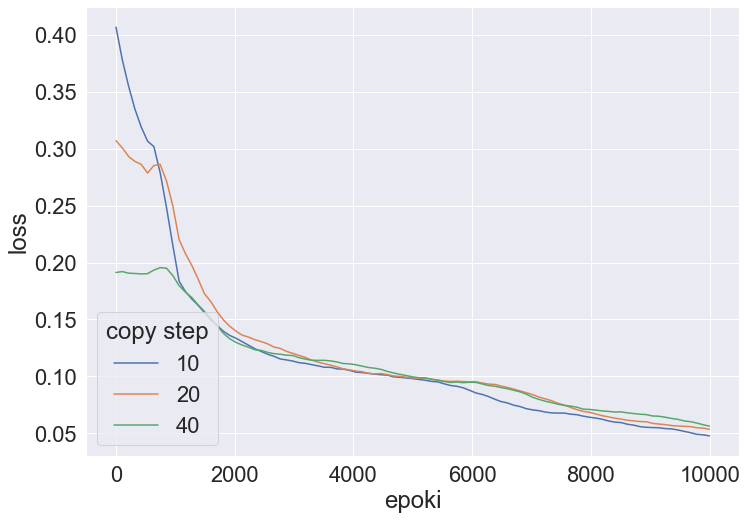

In [22]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(cp_test_numpy, cp_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_4"])
    mean_loss = np.zeros(len(arr))
    for i in range(0, len(arr), 100):
        mean_loss[i] = np.mean(arr[max(0, i-1000):(i+1)])
    mean_loss = mean_loss[mean_loss != 0][5:]
    df = pd.DataFrame({"epoki" : np.linspace(0, 10000, num=len(mean_loss))})
    df["loss"] = mean_loss
    sns.lineplot(data=df, x="epoki", y="loss")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.legend(cp_names, loc=3, title="copy step")
f.savefig("copy step/compare_loss_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

# Rodzaje nauki

In [46]:
enemy_test_numpy = ["rodzaje nauki/arrays_dueling_big.npy", "rodzaje nauki/arrays_random_big_training.npy", "rodzaje nauki/arrays_minmax_big.npy"]
# lr_test_model = ["architecture_test/random_model_64_64_64_32.h5", "architecture_test/random_model_128_128_128_64.h5", "architecture_test/random_model_256_256_256_128.h5"]
enemy_names = ["DQN", "random", "Alfa-beta"]

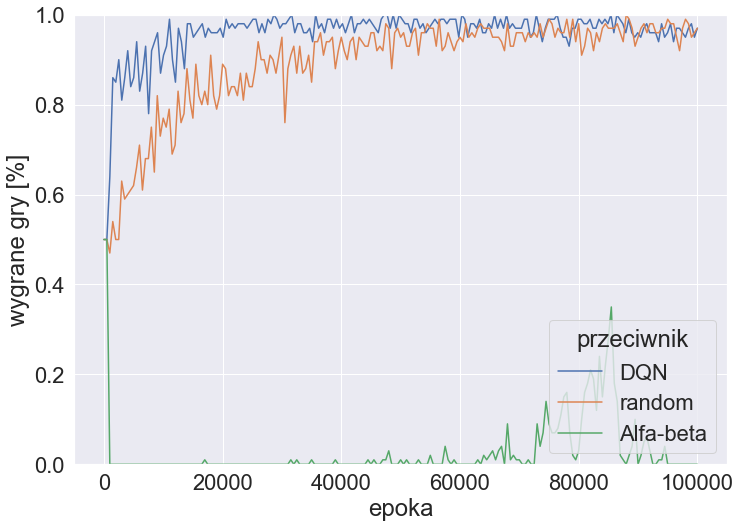

In [49]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(enemy_test_numpy, enemy_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_0"])
    if name != "DQN":
        arr = arr[::5]
    arr[:2] = 0.5
    df = pd.DataFrame({"epoka" : np.linspace(0, 100000, num=len(arr))})
    df["wygrane gry [%]"] = arr
    sns.lineplot(data=df, x="epoka", y="wygrane gry [%]")
ax.set(ylim=(0, 1))
ax.legend(enemy_names, loc=4, title="przeciwnik")
f.savefig("rodzaje nauki/compare_winrate_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 

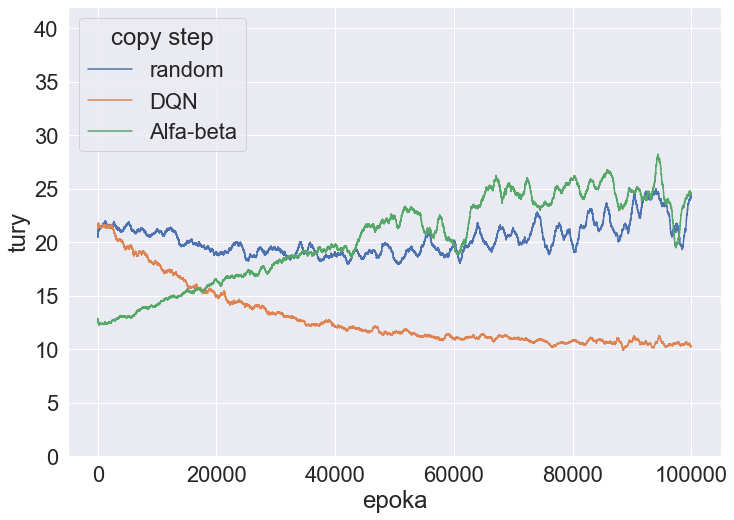

In [25]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(enemy_test_numpy, enemy_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_3"])
    total_turns = np.zeros(len(arr))
    for i in range(len(total_turns)):
        total_turns[i] = np.mean(arr[max(0, i-1000):(i+1)])
    df = pd.DataFrame({"epoka" : np.linspace(0, 100000, num=99800)})
    df["tury"] = total_turns[200:]
    sns.lineplot(data=df, x="epoka", y="tury")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.set(ylim=(0, 42))
ax.legend(enemy_names, loc=2, title="przeciwnik")
f.savefig("rodzaje nauki/compare_turn_size.png", bbox_inches='tight', pad_inches=0, dpi=500)

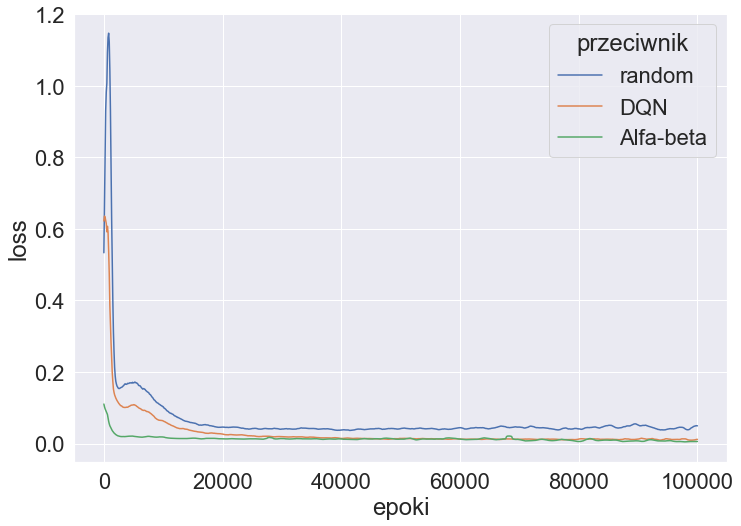

In [225]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = 11.7,8.27
f, ax = plt.subplots(1, 1)
for arr_name, name in zip(enemy_test_numpy, enemy_names):
    test = np.load(arr_name)
    arr = np.array(test["arr_4"])
    mean_loss = np.zeros(len(arr))
    for i in range(0, len(arr), 100):
        mean_loss[i] = np.mean(arr[max(0, i-1000):(i+1)])
    mean_loss = mean_loss[mean_loss != 0][5:]
    df = pd.DataFrame({"epoki" : np.linspace(0, 100000, num=len(mean_loss))})
    df["loss"] = mean_loss
    sns.lineplot(data=df, x="epoki", y="loss")
# plt.plot(np.arange(0, 100, 100), np.ones(101))
ax.legend(enemy_names, loc=1, title="przeciwnik")
f.savefig("rodzaje nauki/compare_loss_size.png", bbox_inches='tight', pad_inches=0, dpi=500) 